In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


In [2]:
def get_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

  return image

In [3]:
def color_extraction(image, number_of_colors):
  
  # Resize image to smaller image in order to reduce further execution time
  modified_image = cv2.resize(image, (600, 400), interpolation= cv2.INTER_AREA)

  # flattened image from 3D to 2D
  modified_image = modified_image.reshape((modified_image.shape[0] * modified_image.shape[1]), 3)

  clf = KMeans(n_clusters=number_of_colors)
  labels = clf.fit_predict(modified_image)
  # print(labels) -> [0 0 0 ... 1 1 1]

  jumlahLabels = Counter(labels)
  # print('jumlahLabels: ', jumlahLabels) -> jumlahLabels:  Counter({0: 172678, 1: 67322})

  center_colors = clf.cluster_centers_
  # print(center_colors)
  # [[183.79379229 159.77189976 133.50193629]
  # [ 83.64274986  50.52329472  37.03554062]]  

  ordered_colors = [center_colors[i] for i in jumlahLabels.keys()]
  # print(ordered_colors)
  # [array([183.79278069, 159.76989911, 133.49961507]), array([83.63641231, 50.51868652, 37.0328966 ])]

  rgb_colors = [ordered_colors[i] for i in jumlahLabels.keys()]
  # print(rgb_colors)
  # [array([183.79127717, 159.76803172, 133.49765288]), array([83.63133784, 50.51373541, 37.02932996])]

  return rgb_colors



In [9]:
def image_color_similarities(query_image, reference_image, number_of_colors, threshold):
  
  query_image_color = color_extraction(query_image, number_of_colors)
  print("Query: ", query_image_color)

  reference_image_color = color_extraction(reference_image, number_of_colors)
  print("Reference: ", reference_image_color)

  iter = 0
  total_difference = 0

  similar = False

  for idx_queries in range(number_of_colors):
    for idx_references in range(number_of_colors):
      curr_color_query = rgb2lab(np.uint8(np.asarray([[query_image_color[idx_queries]]])))
      curr_color_reference = rgb2lab(np.uint8(np.asarray([[reference_image_color[idx_references]]])))
  
      # print('------------------------>')
      # print(curr_color_query)
      # print(curr_color_reference)

      difference = deltaE_cie76(curr_color_query, curr_color_reference)
      # print(difference)

      total_difference = total_difference + difference
      iter = iter + 1;

  
  average_diff = total_difference / iter
  # print(average_diff)

  if (average_diff <= threshold):
    similar = True
  else:
    similar = False

  return similar



Query:  [array([125.5589958 , 113.54666224, 103.36392319]), array([215.32657489, 214.91668873, 213.92133887])]
Reference:  [array([213.55832522, 216.20959485, 214.88203792]), array([105.59534316, 105.14850383, 107.74956074])]
Object is similar by color


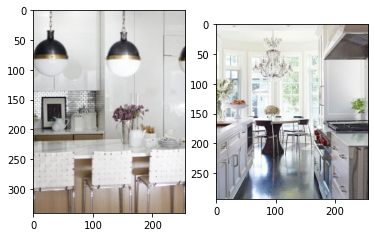

In [13]:
# Test query image
query_image = get_image("/content/drive/MyDrive/data_img_retrieval/DapurResized/dapur_resized4.jpg")
reference_image = get_image("/content/drive/MyDrive/data_img_retrieval/DapurResized/dapur_resized8.jpg")
threshold = 30

match_image = image_color_similarities(query_image, reference_image, 2, threshold)

if(match_image == True):
  print('Object is similar by color')
else:
  print('Object is not similar by color')

plt.subplot(1, 2, 1)
plt.imshow(query_image)

plt.subplot(1, 2, 2)
plt.imshow(reference_image)


